In [1]:
import os
os.environ["VRE_LOGLEVEL"] = "0"
from vre.readers import MultiTaskDataset
from vre.representations import build_representations_from_cfg
from vre_data_analysis import (extract_b64_image_from_fig, histogram_from_classification_task, save_html,
                               extract_pil_from_b64_image, extract_b64_imgsrc_from_fig, gaussian_from_statistics)

%load_ext autoreload
%autoreload 2
%matplotlib inline

/export/home/proiecte/aux/mihai_cristian.pirvu/.conda/envs/ngc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = "../../test/end_to_end/task_mapped_representations/data"
cfg_path = "../../test/end_to_end/task_mapped_representations/cfg.yaml"

representations = build_representations_from_cfg(cfg_path)


[2024-11-25T20:33:08 VRE-INFO] Building 'depth/marigold' (vre name: depth_marigold) (build_representations.py:build_representation_from_cfg:81)


[2024-11-25T20:33:09 VRE-INFO] Building 'semantic-segmentation/mask2former' (vre name: semantic_mask2former_coco_47429163_0) (build_representations.py:build_representation_from_cfg:81)
[2024-11-25T20:33:09 VRE-INFO] Building 'semantic-segmentation/mask2former' (vre name: semantic_mask2former_mapillary_49189528_0) (build_representations.py:build_representation_from_cfg:81)
[2024-11-25T20:33:09 VRE-INFO] Building 'optical-flow/rife' (vre name: opticalflow_rife) (build_representations.py:build_representation_from_cfg:81)
[2024-11-25T20:33:09 VRE-INFO] Building 'default/rgb' (vre name: rgb) (build_representations.py:build_representation_from_cfg:81)
[2024-11-25T20:33:09 VRE-INFO] Building 'normals/depth-svd' (vre name: normals_svd(depth_marigold)) (build_representations.py:build_representation_from_cfg:81)


In [3]:
print(representations)
reader = MultiTaskDataset(data_path, task_names=list(representations), task_types=representations,
                          normalization="min_max")
print(reader)
print(reader[0])

[2024-11-25T20:33:10 VRE-INFO] Tasks used in this dataset: ['depth_marigold', 'normals_svd(depth_marigold)', 'opticalflow_rife', 'rgb', 'semantic_mask2former_coco_47429163_0', 'semantic_mask2former_mapillary_49189528_0'] (multitask_dataset.py:__init__:85)
[2024-11-25T20:33:10 VRE-INFO] Loaded task statistics: {'opticalflow_rife': (2,), 'normals_svd(depth_marigold)': (3,), 'rgb': (3,), 'depth_marigold': (1,)} from /export/home/proiecte/aux/mihai_cristian.pirvu/code/video-representations-extractor/examples/vre_data_analysis/../../test/end_to_end/task_mapped_representations/data/.task_statistics.npz (statistics.py:compute_statistics:37)


{'depth_marigold': Marigold(depth_marigold), 'semantic_mask2former_coco_47429163_0': Mask2Former(semantic_mask2former_coco_47429163_0), 'semantic_mask2former_mapillary_49189528_0': Mask2Former(semantic_mask2former_mapillary_49189528_0), 'opticalflow_rife': FlowRife(opticalflow_rife), 'rgb': RGB(rgb), 'normals_svd(depth_marigold)': DepthNormalsSVD(normals_svd(depth_marigold) ['depth_marigold'])}
[MultiTaskDataset]
 - Path: '/export/home/proiecte/aux/mihai_cristian.pirvu/code/video-representations-extractor/examples/vre_data_analysis/../../test/end_to_end/task_mapped_representations/data'
 - Tasks (6): [Marigold(depth_marigold ['depth_marigold']), DepthNormalsSVD(normals_svd(depth_marigold) ['normals_svd(depth_marigold)']), FlowRife(opticalflow_rife ['opticalflow_rife']), RGB(rgb ['rgb']), Mask2Former(semantic_mask2former_coco_47429163_0 ['semantic_mask2former_coco_47429163_0']), Mask2Former(semantic_mask2former_mapillary_49189528_0 ['semantic_mask2former_mapillary_49189528_0'])]
 - Clas

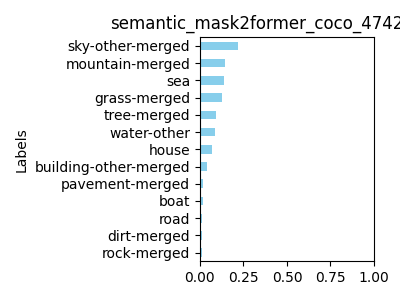

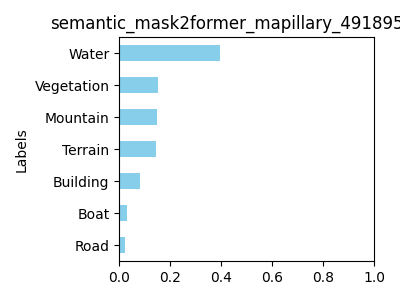

In [4]:
imgsrcs = []
for classif_task in reader.classification_tasks:
    fig = histogram_from_classification_task(reader, classif_task, n=100, mode="random", figsize=(4, 3))
    display(extract_pil_from_b64_image(extract_b64_image_from_fig(fig)))
    imgsrcs.append(extract_b64_imgsrc_from_fig(fig))

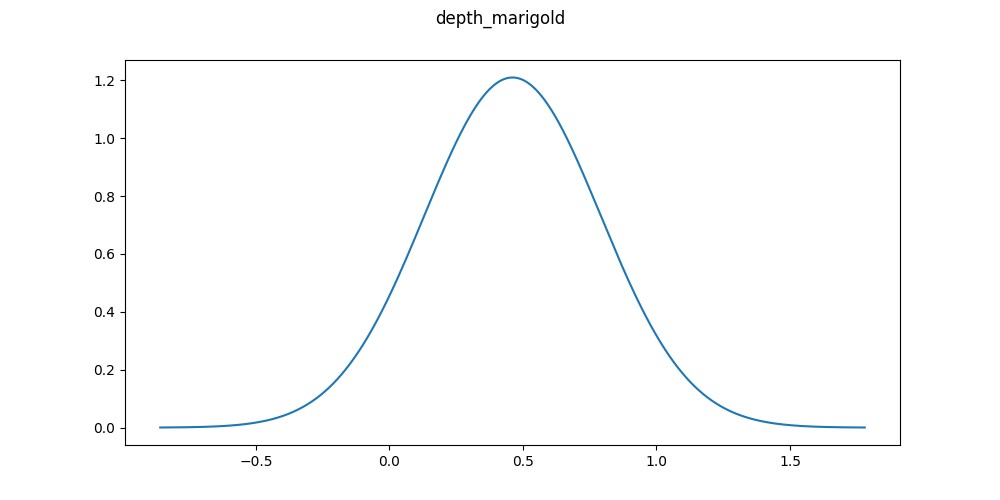

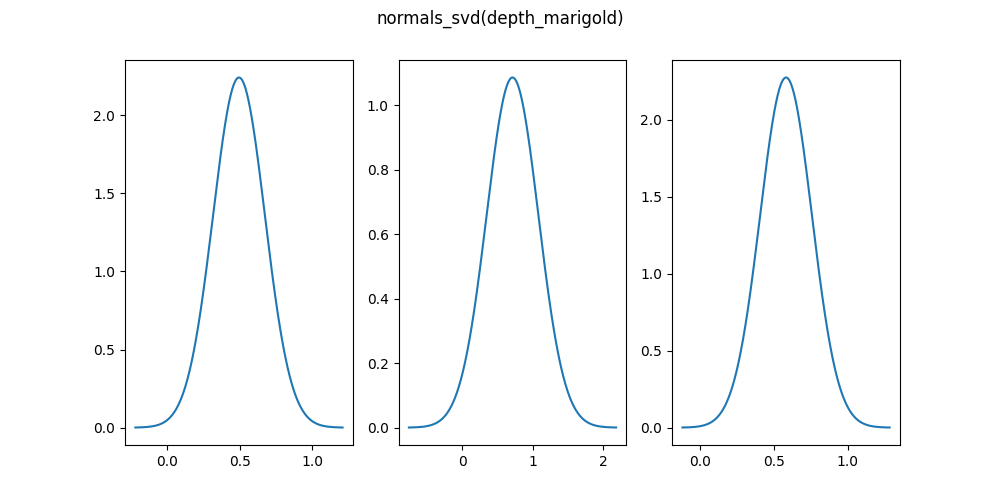

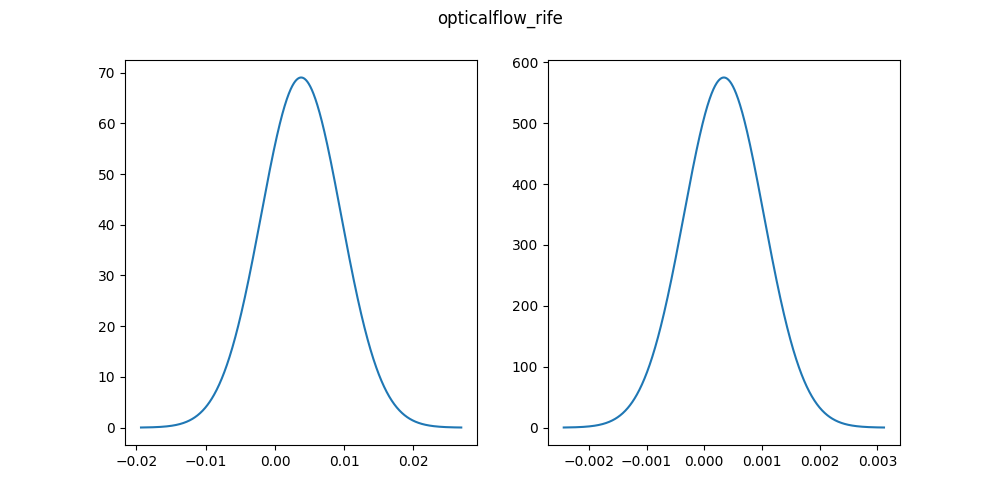

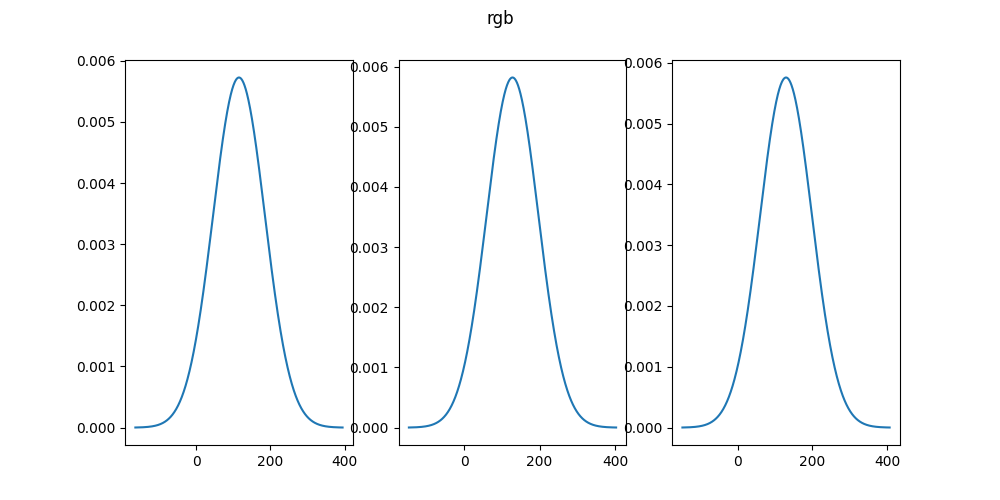

Written html at 'plot.html'


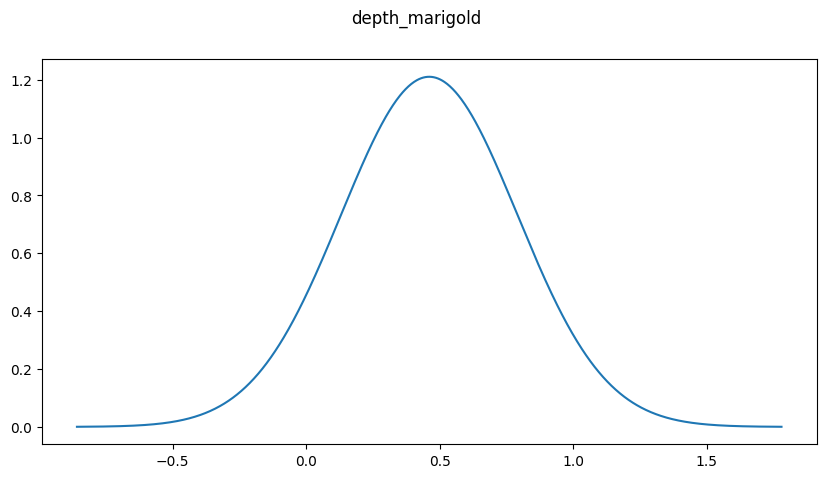

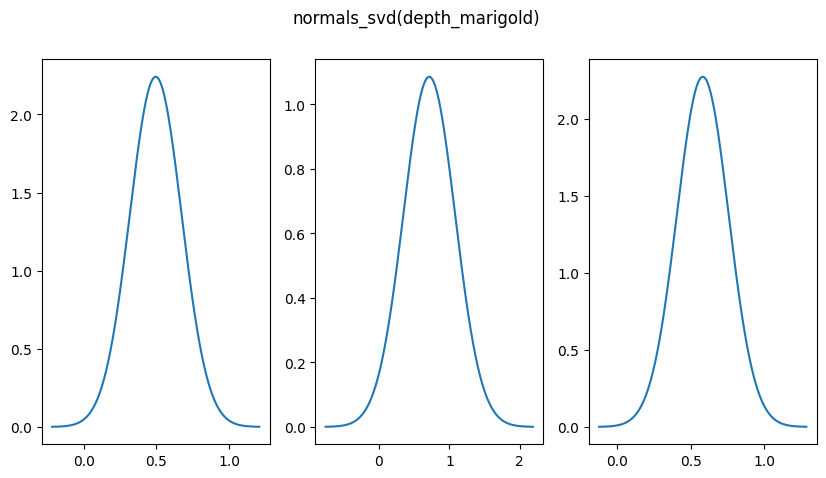

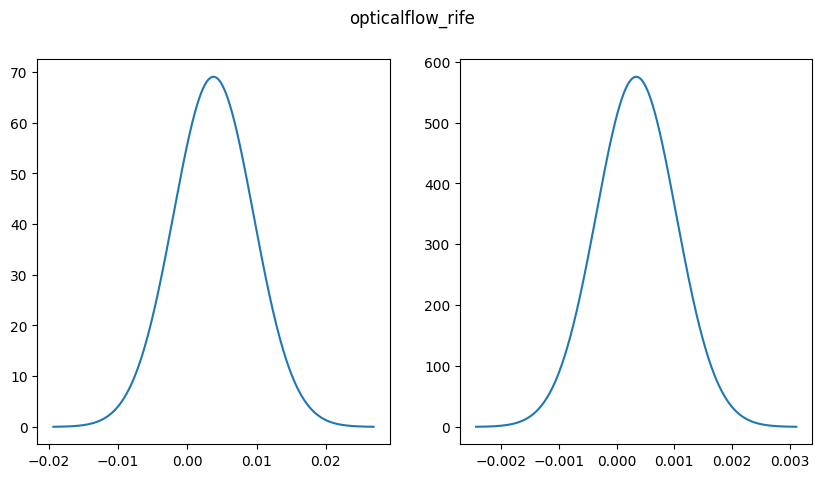

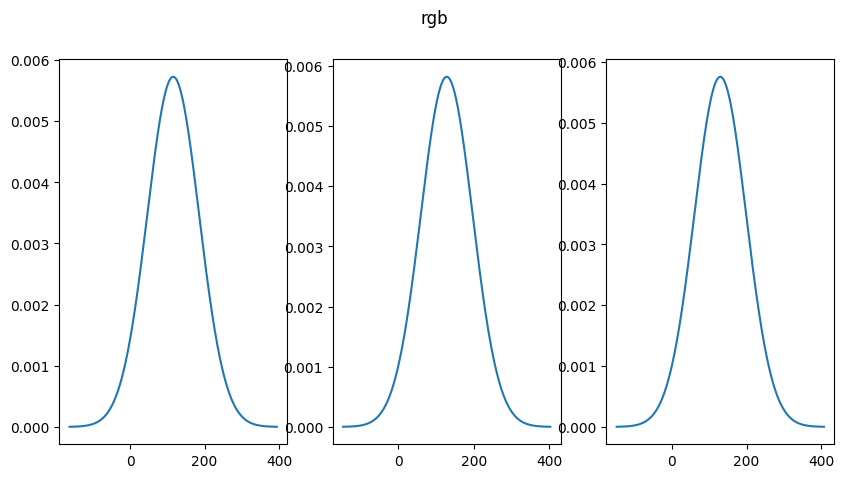

In [5]:

regression_tasks = [t for t in reader.tasks if t not in reader.classification_tasks]
for regression_task in regression_tasks:
    fig = gaussian_from_statistics(reader, regression_task)
    display(extract_pil_from_b64_image(extract_b64_image_from_fig(fig)))
    imgsrcs.append(extract_b64_imgsrc_from_fig(fig))

save_html(imgsrcs, str(reader), "plot.html")
